In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
mvid = pd.read_csv("MVID_101001_171001.txt")
sber = pd.read_csv("SBER_101001_171001.txt")

In [131]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [132]:
a = pd.merge(sber, mvid, on='<DATE>')

In [133]:
a.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [134]:
x = a['<CLOSE>_x']
y = a['<CLOSE>_y']

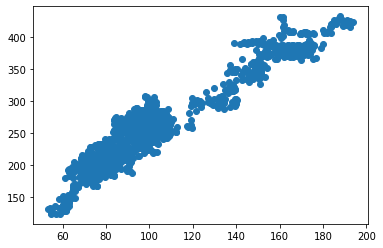

In [135]:
plt.figure()
plt.scatter(x, y)

In [136]:
class Hypothesis:
    """Модель парной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def BGD(self, X, Y):
        alpha = 0.00005
        d0 = sum(self.predict(X) - Y) / len(X)
        d1 = (sum(self.predict(X) - Y) * X) / len(X)

        self.b0 -= alpha * d0
        self.b1 -= alpha * d1

In [137]:
hyp = Hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
print("initial error:", hyp.error(x, y))

0
0
initial error: 36271.58344889084


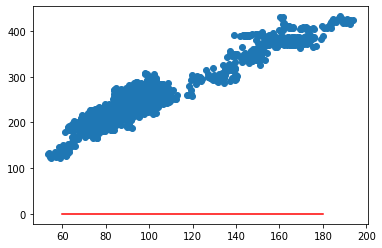

In [138]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


error after gradient descent: 7047.920020566735


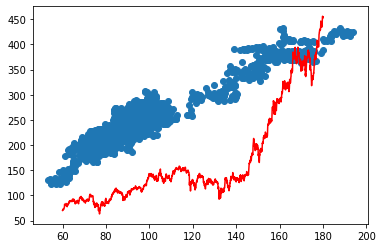

In [139]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

# X0 = np.linspace(55, 195, 1758)
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [140]:
class Hypothesis:
    """Модель парной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [141]:
hyp = Hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


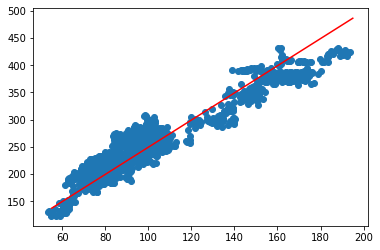

In [146]:
X0 = np.linspace(55, 195, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


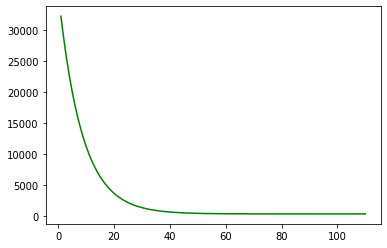

In [143]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()
